Taux d'échantillonnage : 22050
Nombre d'échantillons : 661500
Durée : 30.00 secondes


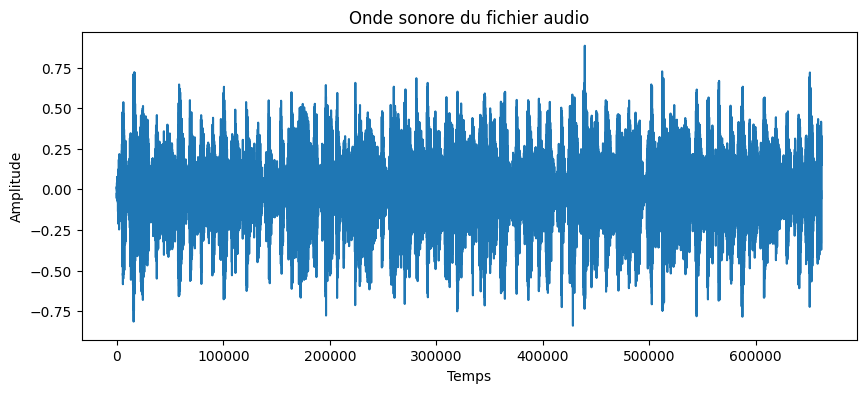

Forme des MFCCs : (40, 1292)


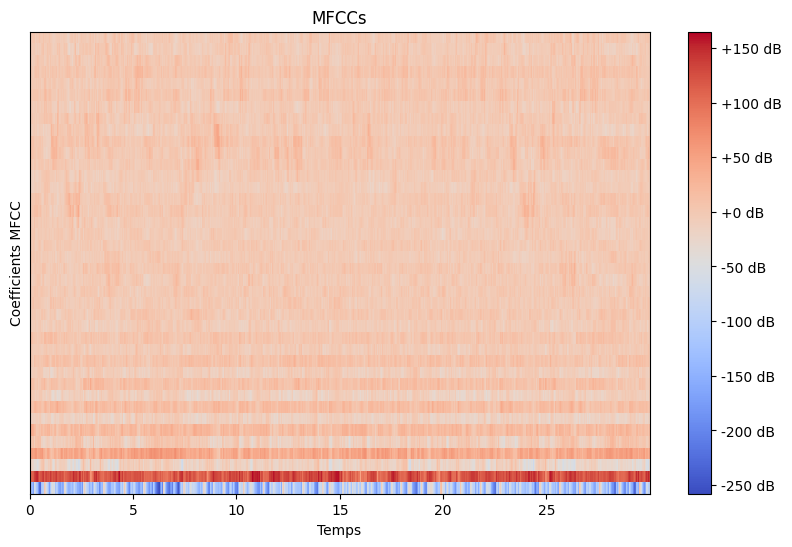

C:\Users\Souad Gouriach\AppData\Local\Temp\ipykernel_33972\521485310.py:51: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, duration=30)
c:\Users\Souad Gouriach\Downloads\archive\.venv\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Erreur avec le fichier Data/genres_original\jazz\jazz.00054.wav: 
Caractéristiques extraites : (999, 40)
Labels associés : 999
Genres encodés : ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Entraînement : (799, 40), Test : (200, 40)


c:\Users\Souad Gouriach\Downloads\archive\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,682 (174.54 KB)

 Trainable params: 44,682 (174.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1285 - loss: 17.3720 - val_accuracy: 0.4187 - val_loss: 2.7720
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2591 - loss: 7.6310 - val_accuracy: 0.3625 - val_loss: 2.0628
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2606 - loss: 4.2879 - val_accuracy: 0.3250 - val_loss: 1.8856
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2866 - loss: 2.7155 - val_accuracy: 0.3187 - val_loss: 1.9298
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2819 - loss: 2.4113 - val_accuracy: 0.2625 - val_loss: 2.0340
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2305 - loss: 2.3443 - val_accuracy: 0.2812 - val_loss: 1.9562
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2817 - loss: 2.0842 - val_accuracy: 0.3625 - val_loss: 1.8940
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3167 - loss: 1.9347 - val_accuracy: 0.3750 - val_los

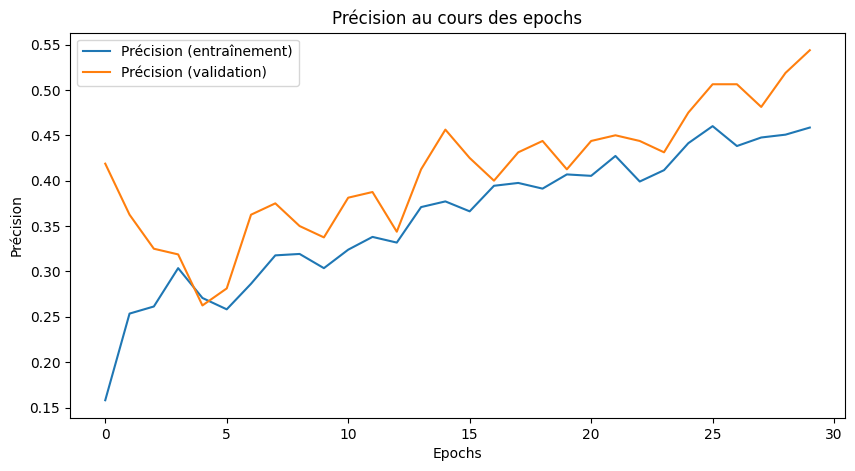

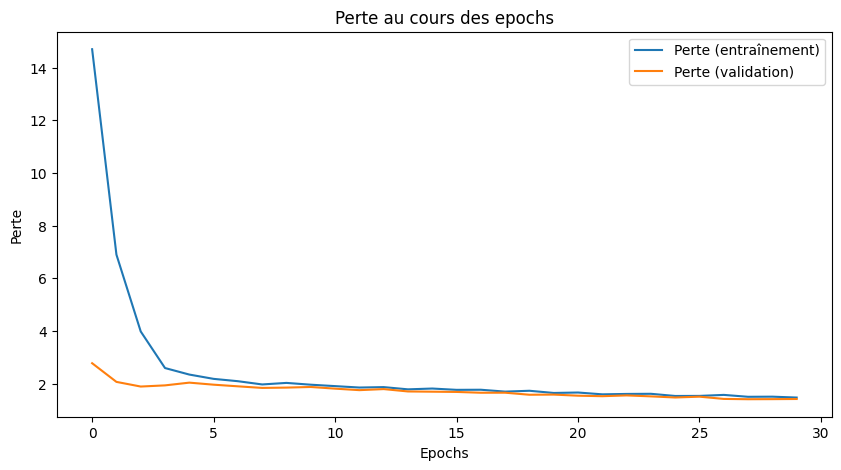

In [6]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Charger un fichier audio pour tester
file_path = "Data/genres_original/blues/blues.00000.wav"  # Chemin vers un fichier audio
audio, sr = librosa.load(file_path, duration=30)  # Charger l'audio (30 secondes max)

# Afficher des informations de base
print(f"Taux d'échantillonnage : {sr}")
print(f"Nombre d'échantillons : {len(audio)}")
print(f"Durée : {len(audio) / sr:.2f} secondes")

# Visualiser l'onde sonore
plt.figure(figsize=(10, 4))
plt.plot(audio)
plt.title("Onde sonore du fichier audio")
plt.xlabel("Temps")
plt.ylabel("Amplitude")
plt.show()


# Extraire les MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

# Afficher les MFCCs
print(f"Forme des MFCCs : {mfccs.shape}")  # Dimensions : (40, nombre de trames audio)

# Visualiser les MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title("MFCCs")
plt.xlabel("Temps")
plt.ylabel("Coefficients MFCC")
plt.show()


def extract_features(file_path):
    """
    Charge un fichier audio et extrait les MFCCs.
    """
    audio, sr = librosa.load(file_path, duration=30)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)  # Moyenne des MFCCs sur le temps

def load_audio_features(data_path):
    """
    Parcourt tous les fichiers dans les sous-dossiers et extrait les MFCCs.
    """
    genres = os.listdir(data_path)  # Liste des genres (noms des sous-dossiers)
    features, labels = [], []

    for genre in genres:
        genre_path = os.path.join(data_path, genre)
        for file_name in os.listdir(genre_path):
            file_path = os.path.join(genre_path, file_name)
            try:
                features.append(extract_features(file_path))
                labels.append(genre)
            except Exception as e:
                print(f"Erreur avec le fichier {file_path}: {e}")
    
    return np.array(features), np.array(labels)

# Test de chargement pour tous les genres
data_path = "Data/genres_original"
X, y = load_audio_features(data_path)

print(f"Caractéristiques extraites : {X.shape}")
print(f"Labels associés : {len(y)}")

from sklearn.preprocessing import LabelEncoder

# Encoder les labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Transformer les genres en entiers
print(f"Genres encodés : {encoder.classes_}")  # Affiche les correspondances

from sklearn.model_selection import train_test_split

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Entraînement : {X_train.shape}, Test : {X_test.shape}")


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Construire un modèle dense
model = Sequential([
    Dense(256, activation='relu', input_shape=(40,)),  # 40 caractéristiques (MFCCs)
    Dropout(0.3),  # Régularisation pour éviter le surapprentissage
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(encoder.classes_), activation='softmax')  # Nombre de genres en sortie
])

# Compiler le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Sauvegarder les résultats d'entraînement
print("Entraînement terminé")


# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Précision sur l'ensemble de test : {accuracy * 100:.2f}%")



import matplotlib.pyplot as plt

# Visualisation des performances
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Précision (entraînement)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.title("Précision au cours des epochs")
plt.xlabel("Epochs")
plt.ylabel("Précision")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Perte (entraînement)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.title("Perte au cours des epochs")
plt.xlabel("Epochs")
plt.ylabel("Perte")
plt.legend()
plt.show()



In [12]:
def augment_audio(audio, sr):
    noise = np.random.randn(len(audio)) * 0.005  # Ajout de bruit
    audio_with_noise = audio + noise

    try:
        # Modifier la hauteur en fréquence
        pitch_factor = np.random.uniform(-5, 5)  # Facteur de pitch (en demi-tons)
        audio_pitch_shifted = librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_factor)
    except Exception as e:
        print(f"Erreur lors de la transformation pitch_shift: {e}")
        audio_pitch_shifted = audio  # Retourne l'audio brut en cas d'erreur

    return [audio_with_noise, audio_pitch_shifted]


file_path = "Data/genres_original/blues/blues.00000.wav"
audio, sr = librosa.load(file_path, duration=30)

# Tester l'augmentation
augmented_audios = augment_audio(audio, sr)
for i, augmented in enumerate(augmented_audios):
    print(f"Augmentation {i + 1}: Taille = {len(augmented)}")



Augmentation 1: Taille = 661500
Augmentation 2: Taille = 661500


In [13]:
file_path = "Data/genres_original/blues/blues.00000.wav"
mfccs_list = extract_features_with_augmentation(file_path)

print(f"Nombre de MFCCs extraits : {len(mfccs_list)}")
for i, mfccs in enumerate(mfccs_list):
    print(f"MFCCs {i + 1}: Forme = {mfccs.shape}")


Nombre de MFCCs extraits : 3
MFCCs 1: Forme = (40,)
MFCCs 2: Forme = (40,)
MFCCs 3: Forme = (40,)


In [14]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Fonction pour augmenter les données audio
def augment_audio(audio, sr):
    noise = np.random.randn(len(audio)) * 0.005  # Ajout de bruit
    audio_with_noise = audio + noise

    try:
        # Modifier la hauteur en fréquence
        pitch_factor = np.random.uniform(-5, 5)  # Facteur de pitch (en demi-tons)
        audio_pitch_shifted = librosa.effects.pitch_shift(audio, sr=sr, n_steps=pitch_factor)
    except Exception as e:
        print(f"Erreur lors de la transformation pitch_shift: {e}")
        audio_pitch_shifted = audio  # Retourne l'audio brut en cas d'erreur

    return [audio_with_noise, audio_pitch_shifted]

# Fonction pour extraire les MFCCs
def extract_features_with_augmentation(file_path):
    try:
        audio, sr = librosa.load(file_path, duration=30)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

        # Ajouter des augmentations
        augmented_audios = augment_audio(audio, sr)
        augmented_mfccs = [librosa.feature.mfcc(y=a, sr=sr, n_mfcc=40) for a in augmented_audios]

        all_mfccs = [np.mean(mfccs.T, axis=0)] + [np.mean(m.T, axis=0) for m in augmented_mfccs]
        return all_mfccs

    except Exception as e:
        print(f"Erreur lors du traitement du fichier {file_path}: {e}")
        return []

# Fonction pour charger les données
def load_audio_features_with_augmentation(data_path):
    genres = os.listdir(data_path)
    features, labels = [], []
    for genre in genres:
        genre_path = os.path.join(data_path, genre)
        for file_name in os.listdir(genre_path):
            file_path = os.path.join(genre_path, file_name)
            try:
                mfccs_list = extract_features_with_augmentation(file_path)
                for mfccs in mfccs_list:
                    features.append(mfccs)
                    labels.append(genre)
            except Exception as e:
                print(f"Erreur avec le fichier {file_path}: {e}")

    if len(features) == 0 or len(labels) == 0:
        raise ValueError("Les données n'ont pas été chargées correctement. Vérifiez vos fichiers audio.")

    return np.array(features), np.array(labels)

# Chargement des données
data_path = "Data/genres_original"
X, y = load_audio_features_with_augmentation(data_path)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Encodage des labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Construire le modèle
model = Sequential([
    Dense(256, activation='relu', input_shape=(40,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Précision sur l'ensemble de test : {accuracy * 100:.2f}%")


C:\Users\Souad Gouriach\AppData\Local\Temp\ipykernel_33972\2749027367.py:28: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, duration=30)
c:\Users\Souad Gouriach\Downloads\archive\.venv\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Erreur lors du traitement du fichier Data/genres_original\jazz\jazz.00054.wav: 
X shape: (2997, 40)
y shape: (2997,)


c:\Users\Souad Gouriach\Downloads\archive\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,682 (174.54 KB)

 Trainable params: 44,682 (174.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1292 - loss: 16.7544 - val_accuracy: 0.1667 - val_loss: 2.1304
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1873 - loss: 2.9655 - val_accuracy: 0.1104 - val_loss: 2.2555
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1736 - loss: 2.2909 - val_accuracy: 0.1396 - val_loss: 2.2004
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1963 - loss: 2.2055 - val_accuracy: 0.2083 - val_loss: 2.1612
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2535 - loss: 2.1114 - val_accuracy: 0.2292 - val_loss: 2.0994
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2591 - loss: 2.0526 - val_accuracy: 0.3333 - val_loss: 1.9497
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2779 - loss: 2.0222 - val_accuracy: 0.3313 - val_loss: 1.9071
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2948 - loss: 1.9127 - val_accuracy: 0.3771 - val_loss